<a href="https://colab.research.google.com/github/iestleija/4808-Programacion/blob/Unidad1/Unidad1/Practices/Practica8_266229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Intelingencia Artificial y Analítica de Datos**

- Curso: Programación para Analítica Descriptiva y Predictiva

- Semestre: Enero-Junio

- Profesor: Dr. Vicente García Jiménez
- Práctica: 08 Análisis de un Dataset con Seaborn y Visualización Avanzada
- Alumno: Ismael Estrada Leija
- Matrícula: 266229

# Práctica #8 - Unidad 1. Análisis de un Dataset con Seaborn y Visualización Avanzada

### Preparación del ambiente

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Objetivo:**

Este ejercicio tiene como objetivo que los estudiantes aprendan a trabajar con seaborn para crear visualizaciones más avanzadas utilizando gráficos como el mapa de calor y el diagrama de violín. También, se les anima a explorar el dataset, hacer análisis descriptivos y aprender a interpretar los resultados.


**Dataset:**

En este caso, vamos a utilizar el dataset de "tips" de seaborn, que contiene información sobre las propinas que dejaron los clientes en un restaurante, junto con detalles sobre el total de la cuenta, el día de la semana, si fue almuerzo o cena, entre otros. Para ello, los estudiantes podran cargar el dataset de la siguiente forma

import seaborn as sns df = sns.load_dataset('tips')

In [49]:
import seaborn as sns
tips = sns.load_dataset('tips')

# 1. Carga y exploración del dataset:

 - Cargar el dataset tips usando seaborn.
 - Realizar un análisis preliminar: utiliza .head(), .info(), .describe() para obtener una visión general de los datos.
 - Verificar la existencia de valores nulos o datos faltantes.

Tenemos las primeras filas del conjunto de datos sobre propinas y su contexto, con datos de la cuenta, del cliente y del momento y día en que se consumió.

In [50]:
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Se trata de un conjunto de datos de 244 filas con 7 columnas con datos completos y tipos de datos heterogéneos.

In [51]:
print(tips.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


Abajo tenemos el análisis estadístico de los datos cuantitativos del conjunto de datos.

In [52]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# 2. Crear los siguientes gráficos con Seaborn:



## a) Mapa de Calor (Heatmap):

 - Objetivo: Visualizar la correlación entre las variables numéricas en el dataset.
 - Instrucciones: Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (total_bill, tip, size).
 - Asegúrate de personalizar el mapa con una paleta de colores y etiquetas en los ejes.

In [53]:
correlation_matrix = tips.corr(numeric_only=True)
print(correlation_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


Observamos que la mayor correlación se encuentra entre el total de la cuenta y la propina, seguida por la correlación entre el total de la cuenta y el tamaño de la orden. Por otro lado, la correlación entre la propina y el tamaño de la orden es mas débil.

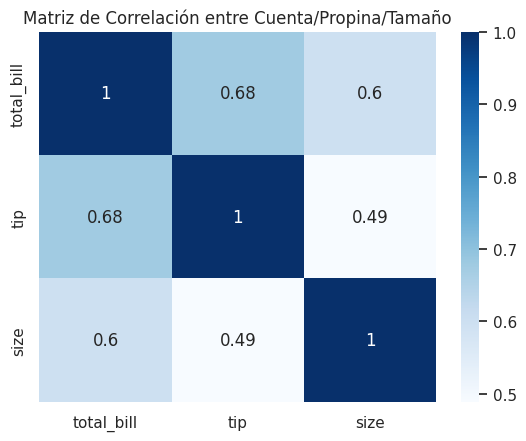

In [54]:
#Heatmap graph definition
sns.heatmap(correlation_matrix, cmap="Blues", annot=True) #cmaps ["coolwarm", "RdBu", "vlag","Blues", "rocket", "viridis","YlGnBu"]

# customization
plt.title("Matriz de Correlación entre Cuenta/Propina/Tamaño")
plt.show()

## b) Diagrama de Violín:

 - Objetivo: Mostrar la distribución de las propinas (tip) para diferentes días de la semana.
 - Instrucciones: Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (day).
 - Personaliza el gráfico con colores y etiquetas adecuadas.

La gráfica nos muestra un comportamiento en general estable con algunas generosidades, a excepción del día viernes que no tiene esas exepcionales propinas a la alza.

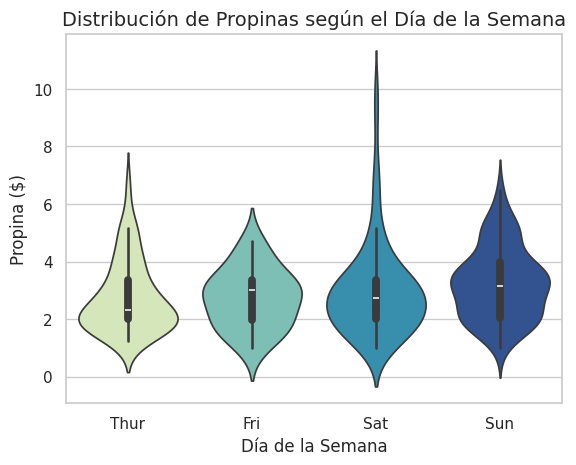

In [55]:
# Set the visual theme
sns.set_theme(style="whitegrid")

# Violin graph definition
sns.violinplot(
    data=tips,
    x="day",
    y="tip",
    palette="YlGnBu",
    hue="day",       # Day dependant hue
    legend=False)

# Customization
plt.title("Distribución de Propinas según el Día de la Semana", fontsize=14)
plt.xlabel("Día de la Semana", fontsize=12)
plt.ylabel("Propina ($)", fontsize=12)

plt.show()

## c) Gráfico de dispersión (Scatter Plot):

 - Objetivo: Analizar la relación entre el total de la cuenta (total_bill) y la propina (tip).

 - Instrucciones: Crea un gráfico de dispersión con total_bill en el eje X y tip en el eje Y. Usa un color diferente para cada día de la semana.

La distribución de propinas con respecto al total de la cuenta  muestra un comportamiento acotado aproximadamente entre el 10% y el 20% con respecto al total de la cuenta, con pocas excepciones fuera de ese rango.

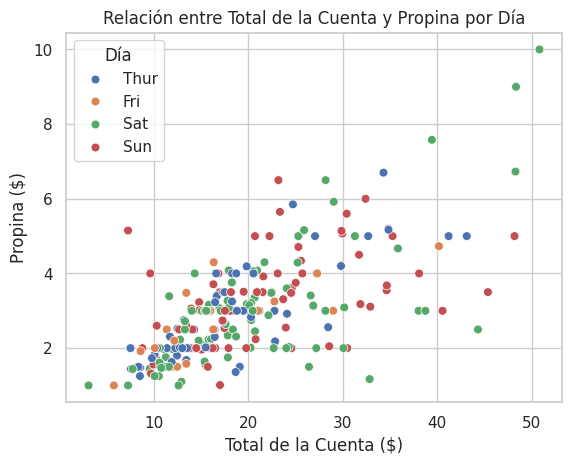

In [56]:
# Scatter graph definition
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="day",
    s=40)

# Customization
plt.title("Relación entre Total de la Cuenta y Propina por Día", fontsize=12)
plt.xlabel("Total de la Cuenta ($)")
plt.ylabel("Propina ($)")
plt.legend(title="Día")

plt.show()

## d) Gráfico de barras (Bar Plot):

 - Objetivo: Comparar el promedio de la propina (tip) por género (sex).

 - Instrucciones: Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).

La media de las propinas con respecto al género del cliente aparece ligeramente superior para el género masculino, diferencia que se proyecta aproximadamente 10% por encima de su contraparte.

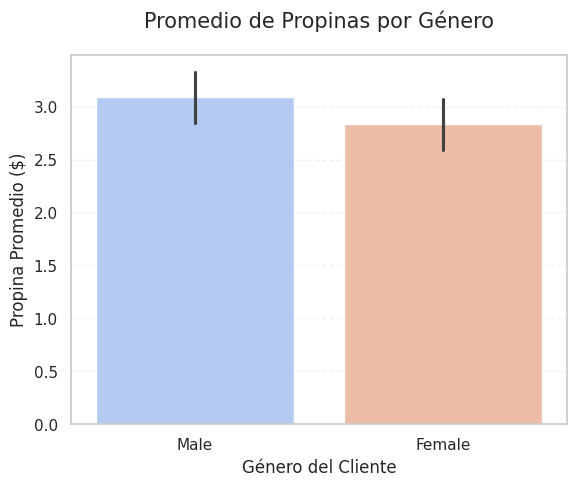

In [57]:
# Define the bar graph
ax = sns.barplot(
    data=tips,
    x="sex",
    y="tip",
    hue="sex",
    palette="coolwarm",
    legend=False)

# Customization
plt.title("Promedio de Propinas por Género", fontsize=15, pad=20)
plt.xlabel("Género del Cliente", fontsize=12)
plt.ylabel("Propina Promedio ($)", fontsize=12)

# Add very light y axis
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# 3. Formato y personalización de los gráficos:
 - Personaliza cada gráfico con títulos, etiquetas en los ejes y leyendas cuando sea necesario.
 - Experimenta con diferentes colores, estilos y tamaños para hacer que las visualizaciones sean claras y atractivas.










No olvides enviar el archivo TXT con la liga a tu notebook en Google Colab y Github